# Import Libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
%matplotlib inline
from sklearn import tree

# import data

In [5]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data.shape

(150, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Create the arrays 

In [28]:
x = data.iloc[:,1:5].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
data["Species"] = pd.Categorical(data["Species"])
data["Species"] = data["Species"].cat.codes
y= data.values[:, 5]
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


# Now we will split the data  and define the Decision Tree Algorithm

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import train_test_split

Now we will split the data into training and testing sets

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [16]:
x_test.shape

(45, 4)

# Now we will the decision tree on training data

In [17]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Next step is visulaising the decision tree 

In [19]:
# set the predictions 
prediction = dec_tree.predict(x_test)
prediction

array([2., 2., 2., 0., 2., 2., 2., 2., 1., 0., 2., 1., 2., 1., 2., 2., 1.,
       0., 0., 2., 2., 0., 2., 1., 1., 0., 2., 2., 1., 1., 1., 2., 2., 0.,
       1., 2., 1., 2., 2., 1., 2., 0., 1., 0., 2.])

[Text(290.625, 692.0833333333334, 'petalwidthCm <= 0.8\ngini = 0.662\nsamples = 105\nvalue = [41, 33, 31]\nclass = Iris-setosa'),
 Text(193.75, 566.25, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = Iris-setosa'),
 Text(387.5, 566.25, 'petalLengthCm <= 4.75\ngini = 0.5\nsamples = 64\nvalue = [0, 33, 31]\nclass = Iris-versicolor'),
 Text(193.75, 440.4166666666667, 'petalwidthCm <= 1.65\ngini = 0.061\nsamples = 32\nvalue = [0, 31, 1]\nclass = Iris-versicolor'),
 Text(96.875, 314.58333333333337, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = Iris-versicolor'),
 Text(290.625, 314.58333333333337, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(581.25, 440.4166666666667, 'petalwidthCm <= 1.75\ngini = 0.117\nsamples = 32\nvalue = [0, 2, 30]\nclass = Iris-virginica'),
 Text(484.375, 314.58333333333337, 'petalwidthCm <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Iris-virginica'),
 Text(387.5, 188.75, 'gini = 0.0\nsamples = 3\nvalue =

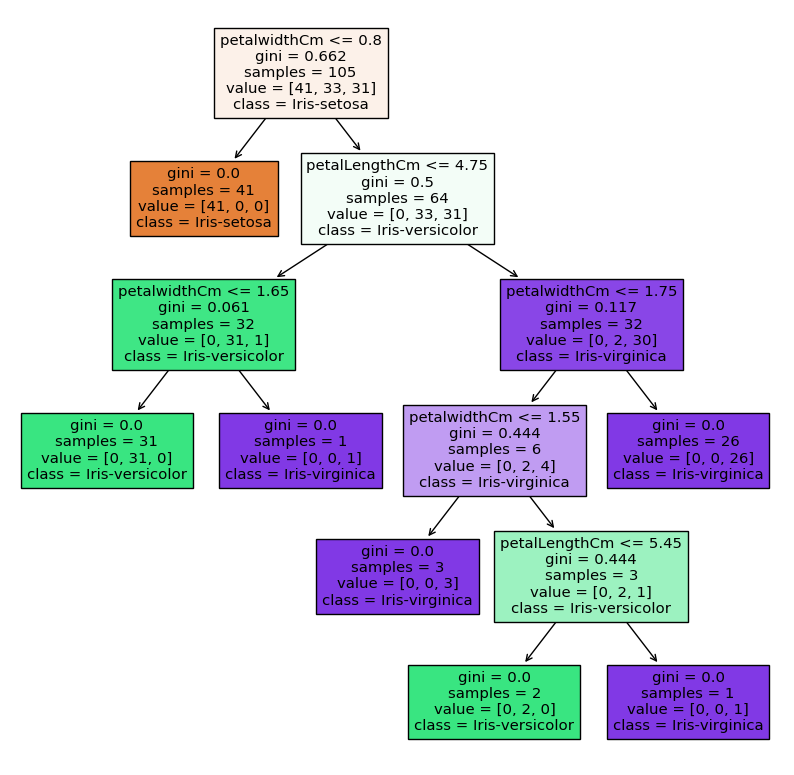

In [27]:
title = ['SepalLengthCm','SepalwidthCm','petalLengthCm','petalwidthCm']
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,axes = pt.subplots(nrows =1,ncols = 1,figsize = (10,10),dpi =100)
tree.plot_tree(dec_tree,feature_names=title,class_names=classes,filled=True)